# RODA data

In [2]:
import pandas as pd

INPUT_DATETIME_FORMAT = "%m/%d/%y %H:%M"
OUTPUT_DATETIME_FORMAT = "%Y-%m-%d %H:%M"

original_df = pd.read_csv("./results/datos_roda_processed.csv")
original_df['timestampStart'] = pd.to_datetime(original_df['timestampStart'], format=OUTPUT_DATETIME_FORMAT)
original_df['timestampEnd'] = pd.to_datetime(original_df['timestampEnd'], format=OUTPUT_DATETIME_FORMAT)
original_df['date'] = original_df['timestampStart'].dt.strftime("%Y-%m-%d")

## RODA Number of Delivery Routes per Day, per Device

In [3]:
original_df_counts = original_df[['gpsID', 'date']].value_counts()
original_df_counts

gpsID    date      
Xch1238  2023-02-17    10
         2023-10-18    10
         2023-02-19     9
         2023-06-05     8
         2023-12-04     8
                       ..
Xch1431  2023-11-03     1
         2023-11-11     1
         2023-11-14     1
         2023-11-19     1
Xch1592  2023-12-09     1
Length: 1347, dtype: int64

The result dataset shows there is not any device logging over 30 delivery routes per day. Indicating everything should be ok, however 10 routes per day per devices as maximum could too few. 

## Minimum and Maximum Distance Analysis

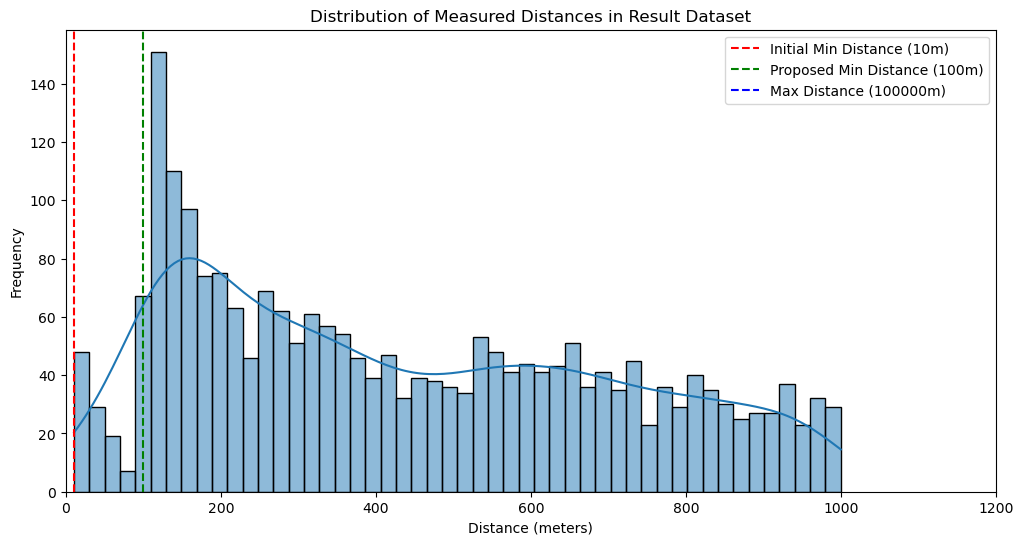

count    2322.000000
mean      430.705924
std       272.965174
min        10.579000
25%       182.754250
50%       374.058000
75%       649.170750
max       999.906000
Name: measuredDistance, dtype: float64


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyzing the distribution of measured distances
plt.figure(figsize=(12, 6))
sns.histplot(original_df['measuredDistance'], bins=50, kde=True)
plt.title('Distribution of Measured Distances in Result Dataset')
plt.xlabel('Distance (meters)')
plt.ylabel('Frequency')

# Setting x-axis limits to focus on the area with more routes
# For example, focusing on distances less than 500 meters
plt.xlim(0, 1200)

# initial and proposed thresholds
plt.axvline(10, color='r', linestyle='--', label='Initial Min Distance (10m)')
plt.axvline(100, color='g', linestyle='--', label='Proposed Min Distance (100m)')
plt.axvline(25000, color='b', linestyle='--', label='Max Distance (100000m)')
plt.legend()
plt.show()

# Display basic statistical details of the measured distances
distance_stats = original_df['measuredDistance'].describe()
print(distance_stats)

As we filtered out routes with more than 1km distance it is possible that we might have lose lot of valid routes.

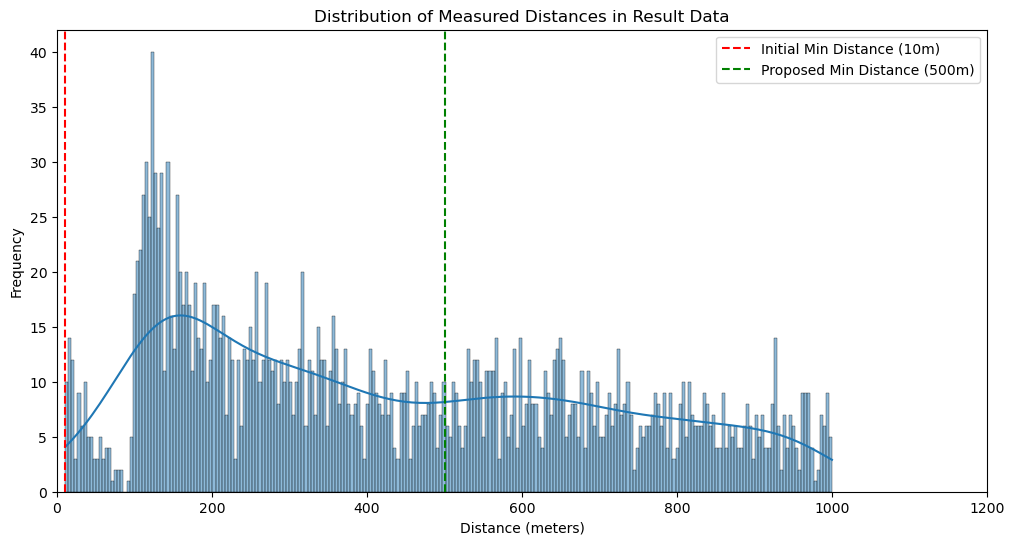

count    2322.000000
mean      430.705924
std       272.965174
min        10.579000
25%       182.754250
50%       374.058000
75%       649.170750
max       999.906000
Name: measuredDistance, dtype: float64


In [7]:
# Analyzing the distribution of measured distances
plt.figure(figsize=(12, 6))
sns.histplot(original_df['measuredDistance'], bins=250, kde=True)
plt.title('Distribution of Measured Distances in Result Data')
plt.xlabel('Distance (meters)')
plt.ylabel('Frequency')

# Setting x-axis limits to focus on the area with more routes
# For example, focusing on distances less than 500 meters
plt.xlim(0, 1200)

# initial and proposed thresholds
plt.axvline(10, color='r', linestyle='--', label='Initial Min Distance (10m)')
plt.axvline(500, color='g', linestyle='--', label='Proposed Min Distance (500m)')
#plt.axvline(25000, color='b', linestyle='--', label='Max Distance (25000m)')
plt.legend()
plt.show()

# Display basic statistical details of the measured distances
distance_stats = original_df['measuredDistance'].describe()
print(distance_stats)

It look like the data still include too short routes that are not valid. Minimum threshold for route should be 500 meters.

## Duration distribution analysis

In [10]:
original_df['durationMinutes'] = (original_df['timestampEnd'] - original_df['timestampStart']).dt.total_seconds() / 60

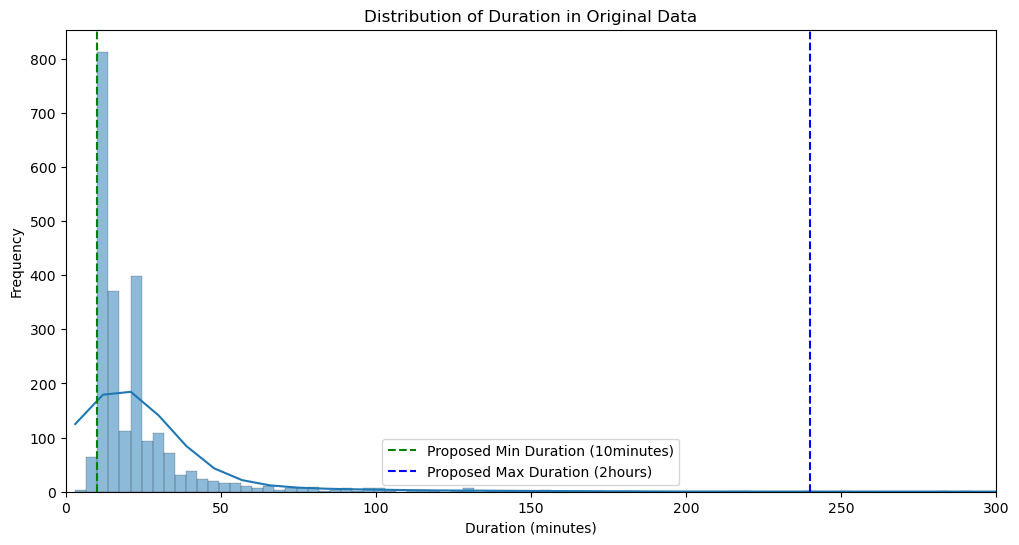

count    2322.000000
mean       28.229543
std        66.752292
min         3.000000
25%        13.000000
50%        16.000000
75%        24.000000
max      1788.000000
Name: durationMinutes, dtype: float64


In [11]:
# Analyzing the distribution of measured distances
plt.figure(figsize=(12, 6))
sns.histplot(original_df['durationMinutes'], bins=500, kde=True)
plt.title('Distribution of Duration in Original Data')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

# Setting x-axis limits to focus on the area with more routes
# For example, focusing on distances less than 500 meters
plt.xlim(0, 300)

# initial and proposed thresholds
plt.axvline(10, color='g', linestyle='--', label='Proposed Min Duration (10minutes)')
plt.axvline(240, color='b', linestyle='--', label='Proposed Max Duration (2hours)')
plt.legend()
plt.show()

# Display basic statistical details of the measured distances
distance_stats = original_df['durationMinutes'].describe()
print(distance_stats)

Result data still have routes with less than 10minutes duration and also invalid routes with more than 2hours duration.

# Guajira Data

In [21]:
INPUT_DATETIME_FORMAT = "%m/%d/%y %H:%M"
OUTPUT_DATETIME_FORMAT = "%Y-%m-%d %H:%M"

original_df = pd.read_csv("./results/datos_guajira_processed.csv")
original_df['timestampStart'] = pd.to_datetime(original_df['timestampStart'], format=OUTPUT_DATETIME_FORMAT)
original_df['timestampEnd'] = pd.to_datetime(original_df['timestampEnd'], format=OUTPUT_DATETIME_FORMAT)
original_df['date'] = original_df['timestampStart'].dt.strftime("%Y-%m-%d")
original_df['durationMinutes'] = (original_df['timestampEnd'] - original_df['timestampStart']).dt.total_seconds() / 60

## Number of Delivery Routes per Day, per Device

In [22]:
original_df_counts = original_df[['gpsID', 'date']].value_counts()
original_df_counts

gpsID    date      
Xch1488  2023-10-07    8
         2023-10-08    7
Xch1468  2023-04-10    6
Xch1488  2023-09-23    6
         2023-11-27    5
                      ..
Xch1484  2023-08-28    1
         2023-08-25    1
         2023-02-17    1
         2023-01-31    1
Xch1584  2023-12-09    1
Length: 483, dtype: int64

## Minimum and Maximum Distance Analysis

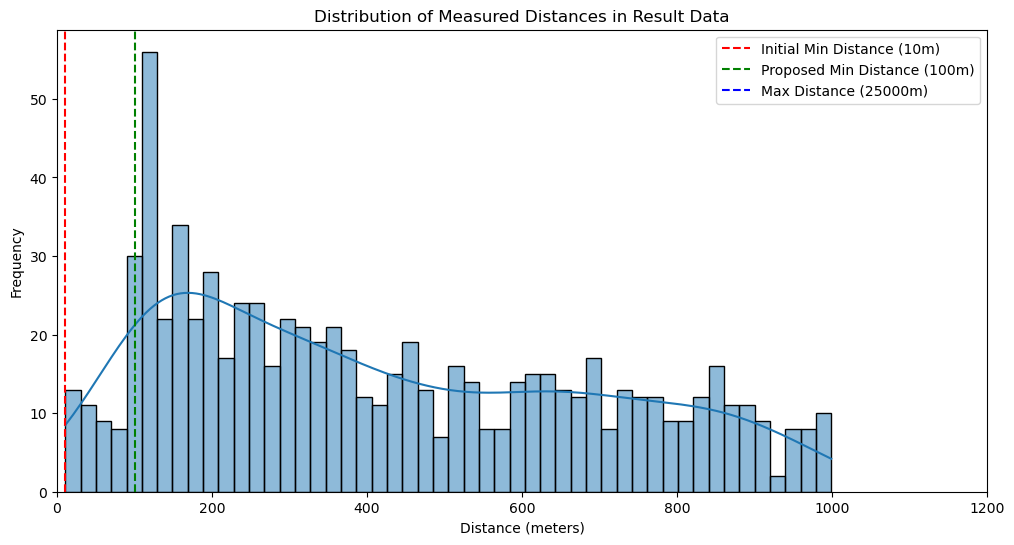

count    774.000000
mean     418.290194
std      270.675560
min       10.598000
25%      178.915000
50%      356.201000
75%      636.441500
max      998.962000
Name: measuredDistance, dtype: float64


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyzing the distribution of measured distances
plt.figure(figsize=(12, 6))
sns.histplot(original_df['measuredDistance'], bins=50, kde=True)
plt.title('Distribution of Measured Distances in Result Data')
plt.xlabel('Distance (meters)')
plt.ylabel('Frequency')

# Setting x-axis limits to focus on the area with more routes
# For example, focusing on distances less than 500 meters
plt.xlim(0, 1200)

# initial and proposed thresholds
plt.axvline(10, color='r', linestyle='--', label='Initial Min Distance (10m)')
plt.axvline(100, color='g', linestyle='--', label='Proposed Min Distance (100m)')
plt.axvline(25000, color='b', linestyle='--', label='Max Distance (25000m)')
plt.legend()
plt.show()

# Display basic statistical details of the measured distances
distance_stats = original_df['measuredDistance'].describe()
print(distance_stats)

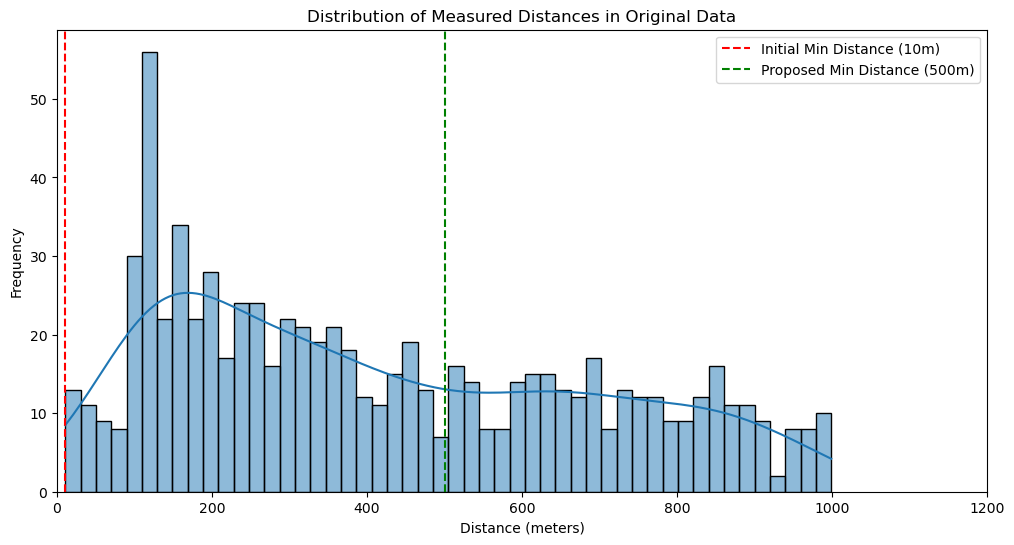

count    774.000000
mean     418.290194
std      270.675560
min       10.598000
25%      178.915000
50%      356.201000
75%      636.441500
max      998.962000
Name: measuredDistance, dtype: float64


In [24]:
# Analyzing the distribution of measured distances
plt.figure(figsize=(12, 6))
sns.histplot(original_df['measuredDistance'], bins=50, kde=True)
plt.title('Distribution of Measured Distances in Original Data')
plt.xlabel('Distance (meters)')
plt.ylabel('Frequency')

# Setting x-axis limits to focus on the area with more routes
# For example, focusing on distances less than 500 meters
plt.xlim(0, 1200)

# initial and proposed thresholds
plt.axvline(10, color='r', linestyle='--', label='Initial Min Distance (10m)')
plt.axvline(500, color='g', linestyle='--', label='Proposed Min Distance (500m)')
#plt.axvline(25000, color='b', linestyle='--', label='Max Distance (25000m)')
plt.legend()
plt.show()

# Display basic statistical details of the measured distances
distance_stats = original_df['measuredDistance'].describe()
print(distance_stats)

For Guajira data, as well, it looks like we are accepting routes too short and filtering out routes that are actually valid.

## Duration distribution analysis

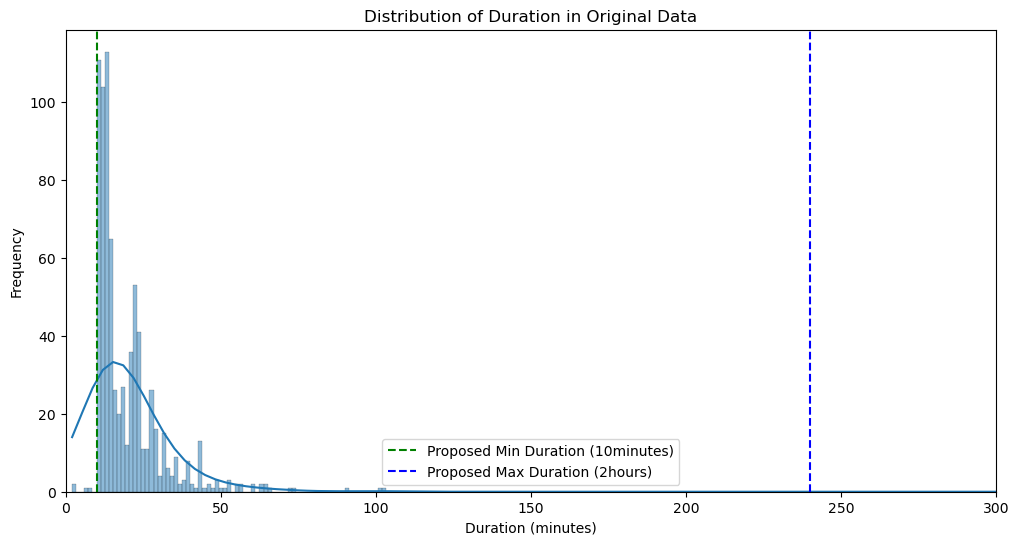

count    774.000000
mean      21.693798
std       34.726774
min        2.000000
25%       12.000000
50%       15.000000
75%       24.000000
max      659.000000
Name: durationMinutes, dtype: float64


In [25]:
# Analyzing the distribution of measured distances
plt.figure(figsize=(12, 6))
sns.histplot(original_df['durationMinutes'], bins=500, kde=True)
plt.title('Distribution of Duration in Original Data')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

# Setting x-axis limits to focus on the area with more routes
# For example, focusing on distances less than 500 meters
plt.xlim(0, 300)

# initial and proposed thresholds
plt.axvline(10, color='g', linestyle='--', label='Proposed Min Duration (10minutes)')
plt.axvline(240, color='b', linestyle='--', label='Proposed Max Duration (2hours)')
plt.legend()
plt.show()

# Display basic statistical details of the measured distances
distance_stats = original_df['durationMinutes'].describe()
print(distance_stats)

It shows that we are including too short duration routes and also routes that took more than 2 hours. We need to make the script to exclude them